# Let's get recurrent!?

Playing with recurrence analysis in rat and men.

Don't know what recurrence matrices are? Give the wikipedia a read https://en.wikipedia.org/wiki/Recurrence_plot

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.io import loadmat
import numpy as np

from danalysis import analysis as da
from danalysis import plot as rplot

from fakespikes import rates, util

## First some simple (fake) examples

to show that the recurrence code is working, and to see what different kinds out recurrence matrices look like.

Our fake example data is

- a sin wave
- a set of 'neural bursts'
- oscillatory EPSPs 
- brown noise
- white noise

In [2]:
t = 1
dt = 1e-3  # approx sample time of the real data
times = util.create_times(t, dt)

f = 12
r = 1 # unit height

osc = rates.osc(times, 1, f)
osc2 = rates.osc2(times, 1, f, min_a=0)
psp = rates.excitatory(times, 1, r, f, dt)
diff = rates.stim(times, r, 1e-2)
white = np.random.normal(0, 1e-2, size=len(times))

### Plot 'em

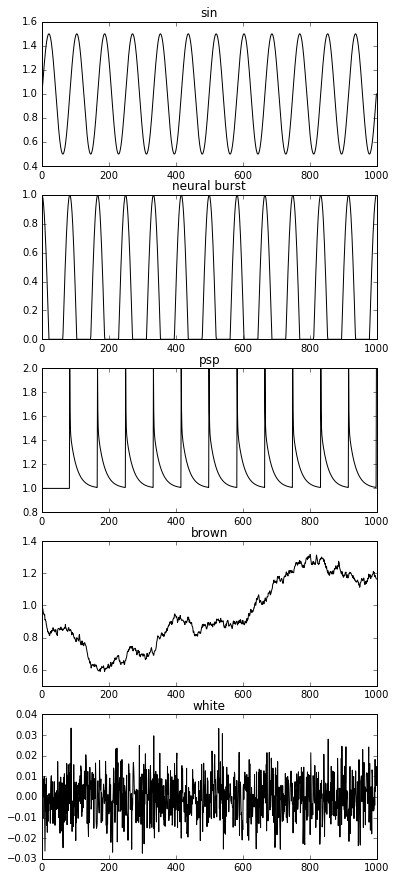

In [3]:
names = ["sin", "neural burst", "psp", "brown", "white"]
examples = [osc, osc2, psp, diff, white]

i = 0
n_plots = len(names)
plt.figure(figsize=(6, 15))
for n, x in zip(names, examples):
    i += 1
    plt.subplot(n_plots, 1, i)
    plt.plot(x, 'k') 
    plt.title(n)

### Plot their recurrence matrices

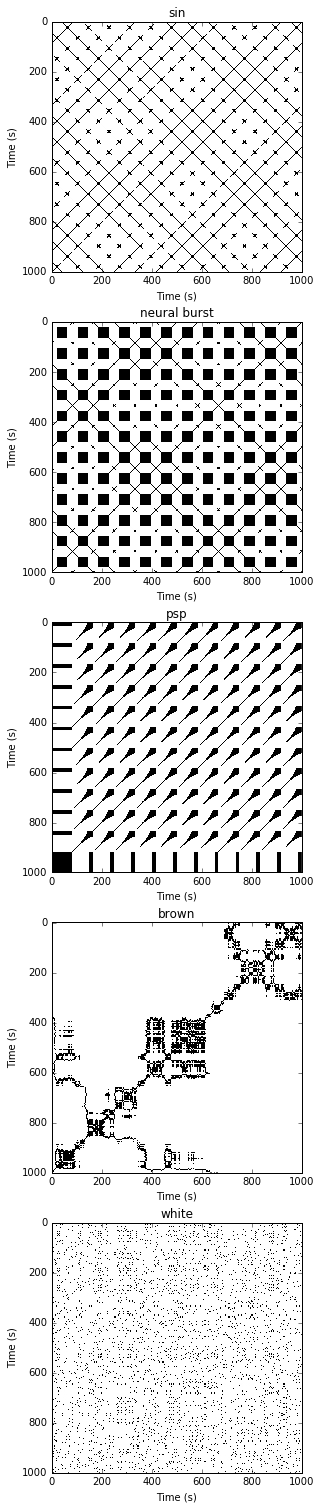

In [4]:
i = 0
plt.figure(figsize=(20, 26))
for n, x in zip(names, examples):
    i += 1
    
    plt.subplot(n_plots, 1, i)
    ep = np.std(x) * (1/10.)
    rmat = da.recurrence_matrix(x, x, ep)
    
    plt.imshow(rmat, cmap='Greys', interpolation="none", label=n)
    plt.xlabel("Time (s)")
    plt.ylabel("Time (s)")
    plt.title(n)

All the example data look very different in recurrence space compared to their time domain representations.  Cool. 

Lets' look at some real data....

# Recurrence of rat and man

We have data from

- Rat olfactory bulb (LFP)
- Human occipital (EEG - Oz)
- Human motor 1 (ECoG)

---

Load all the data, and for human data break into five trials (or example sets). With this done, all the data is about the same size and same temporal resolution. 

_Note_: the epsilon value for all recurrence matrices is 10 * SD, which from an intial reading of the literature seems to be, somewhat, of a standard. Episilon is how close two points must be if that are considered the same. 

#### Squeek...

In [5]:
# LFP data collected from olfactory bulb
# (thanks EL!)
rat = loadmat('data/rat olfactory lfp.mat')['FriendMOB']

#### Blab... 

In [6]:
# EEG collected over visual areas (no know PAC)
eeg = loadmat('data/human oz eeg.mat')
eeg_task = eeg['oz_dat_task'].flatten()
eeg_rest = eeg['oz_dat_rest'].flatten()

# break into 5 "trials"
n_trials = 5
tasks = []
rests = []
for n in range(3, 8):
   tasks.append(eeg_task[int(n*1e3):int((n+1)*1e3)])
   rests.append(eeg_rest[int(n*1e3):int((n+1)*1e3)])
    
tasks = np.vstack(tasks)
rests = np.vstack(rests)
eeg_t = np.arange(0, 1,.001) 

#### More blab...

In [7]:
# Ecog collected over m1 (shape-PAC present)
# this is just rest data (I think...)
ecog = np.load('data/human m1 ecog.npy')

# break into 5 "trials"
n_trials = 5
ecogs = []
for n in range(1, 6):
   ecogs.append(ecog[int(n*1e3):int((n+1)*1e3)])

ecog = np.vstack(ecogs)
ecog_t = np.arange(0, ecog.shape[1]*.001,.001) 

## Example plots of all the trials, in time

A look at what we've got to work with.

#### Rat' LFP

Sweet sweet PAC.

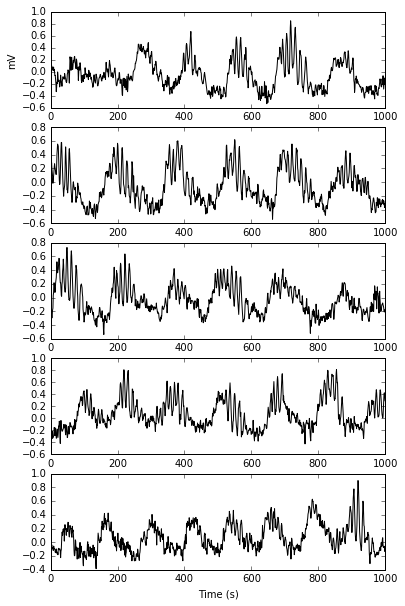

In [8]:
n_trials = 5
plt.figure(figsize=(6, 10))
for n in range(n_trials):
    plt.subplot(n_trials, 1, n + 1)
    plt.plot(rat[n, :], 'k');

    if n == 0:
        plt.ylabel("mV")
    
plt.xlabel("Time (s)")

#### Man's EEG

Go go alpha go.

A person at rest, then doing a visual detection task.

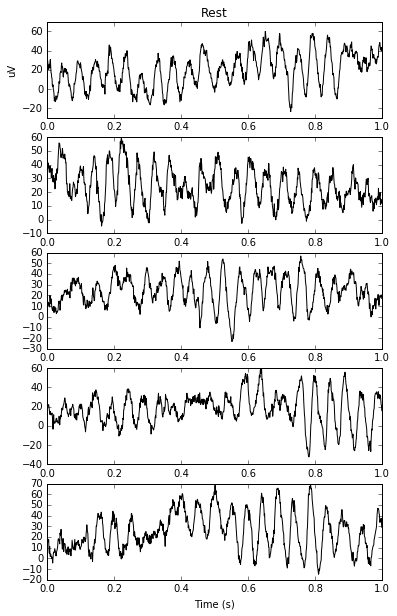

In [9]:
n_trials = 5
plt.figure(figsize=(6, 10))
for n in range(n_trials):
    plt.subplot(n_trials, 1, n + 1)
    plt.plot(eeg_t, rests[n, :], 'k');
    
    if n == 0:
        plt.title("Rest")
        plt.ylabel("uV")

plt.xlabel("Time (s)")

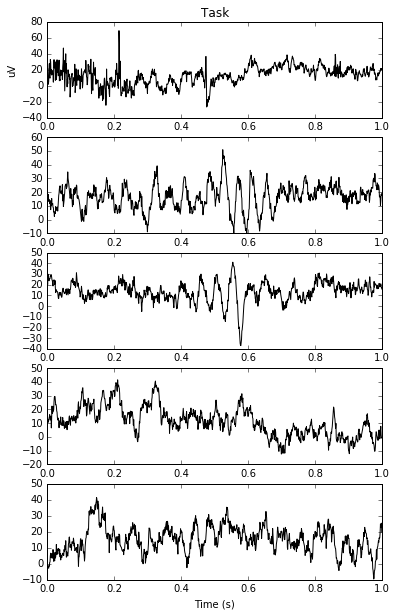

In [10]:
n_trials = 5
plt.figure(figsize=(6, 10))
for n in range(n_trials):
    plt.subplot(n_trials, 1, n + 1)
    plt.plot(eeg_t, tasks[n, :], 'k');
    
    if n == 0:
        plt.title("Task")
        plt.ylabel("uV")
        
plt.xlabel("Time (s)")

#### Man's ECoG

PD beta, that sharp shape PAC.

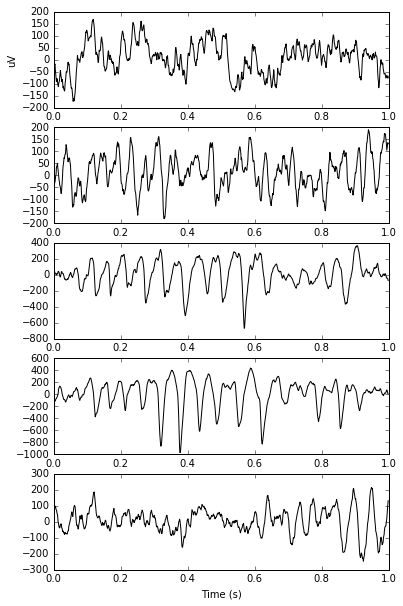

In [11]:
n_trials = 5
plt.figure(figsize=(6, 10))
for n in range(n_trials):
    plt.subplot(n_trials, 1, n + 1)
    plt.plot(ecog_t, ecog[n, :], 'k');
    
    if n == 0:
        plt.ylabel("uV")
        
plt.xlabel("Time (s)")

# Recurrence

## Rat high and low PAC

In the rat data, plots 2 and 5 have the most and least PAC. Let's compare their recurrene plots

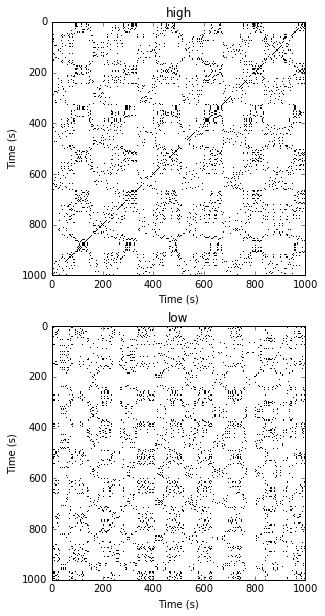

In [12]:
# 
n_trials = 2
sel = [1, 4]
names = ["high", "low"]
plt.figure(figsize=(10, 10))
for i, (n, name) in enumerate(zip(sel, names)):
    ep = np.std(rat[n, :]) * (1/10.)
    rmat = da.recurrence_matrix(rat[n, :], rat[n, :], ep)
    
    plt.subplot(n_trials, 1, i + 1)
    plt.imshow(rmat, cmap='Greys', interpolation="none", label='trial {}'.format(n))
    plt.xlabel("Time (s)")
    plt.ylabel("Time (s)")
    plt.title(name)

## Man, high and low 'shape PAC'

In the human ecog data, plots 1 and 4 have the most and least shape PAC.

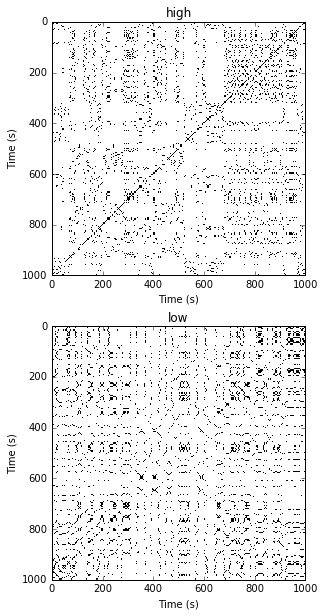

In [13]:
n_trials = 2
sel = [0, 3]
names = ["high", "low"]

plt.figure(figsize=(10, 10))
for i, (n, name) in enumerate(zip(sel, names)):
    ep = np.std(ecog[n, :]) * (1/10.)
    rmat = da.recurrence_matrix(ecog[n, :], ecog[n, :], ep)
    
    plt.subplot(n_trials, 1, i + 1)
    plt.imshow(rmat, cmap='Greys', interpolation="none", label='trial {}'.format(n))
    plt.xlabel("Time (s)")
    plt.ylabel("Time (s)")
    plt.title(name)

## EEG, high and low power

Compare highest power alpha at rest, to lowest power in task.

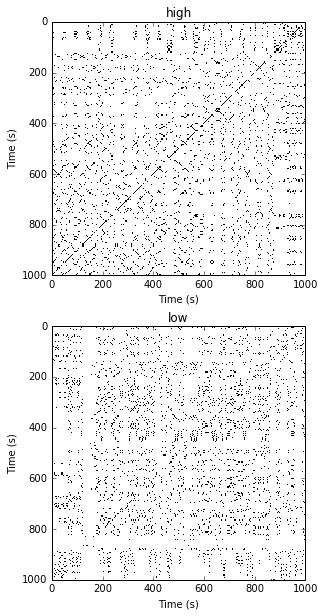

In [14]:
# 
n_trials = 2
names = ["high", "low"]
plt.figure(figsize=(10, 10))
xs = [rests[0, :], tasks[4, :]] 
for i, (name, x) in enumerate(zip(names, xs)):
    ep = np.std(x) * (1/10.)
    rmat = da.recurrence_matrix(x, x, ep)
    
    plt.subplot(n_trials, 1, i + 1)
    plt.imshow(rmat, cmap='Greys', interpolation="none", label='trial {}'.format(n))
    plt.xlabel("Time (s)")
    plt.ylabel("Time (s)")
    plt.title(name)

Compare continous power alpha at rest, to 'bursting' in task

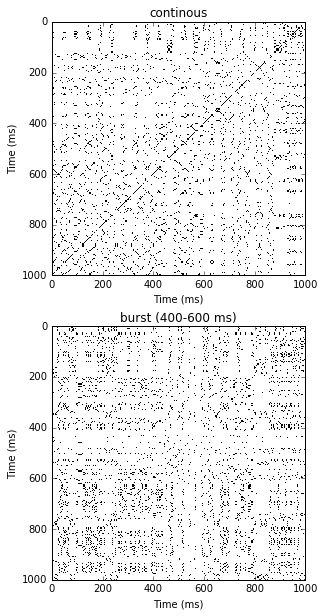

In [15]:
# 
n_trials = 2
names = ["continous", "burst (400-600 ms)"]
plt.figure(figsize=(10, 10))
xs = [rests[0, :], tasks[2, :]] 
for i, (name, x) in enumerate(zip(names, xs)):
    ep = np.std(x) * (1/10.)
    rmat = da.recurrence_matrix(x, x, ep)
    
    plt.subplot(n_trials, 1, i + 1)
    plt.imshow(rmat, cmap='Greys', interpolation="none", label='trial {}'.format(n))
    plt.xlabel("Time (ms)")
    plt.ylabel("Time (ms)")
    plt.title(name)

## Compare strong oscillatory PAC, to strong shape PAC to high power oscillation without PAC

i.e. the money plot.

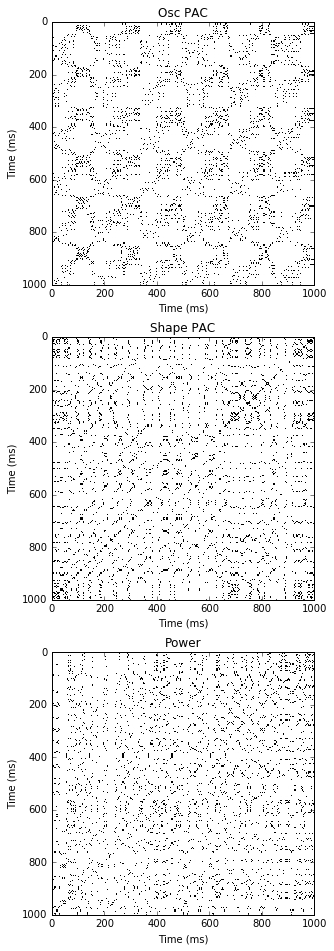

In [16]:
# 
n_trials = 3
names = ["Osc PAC", "Shape PAC", "Power"]
xs = [rat[1, :], ecog[2, :], rests[1, :]] 

plt.figure(figsize=(10, 16))
for i, (name, x) in enumerate(zip(names, xs)):
    ep = np.std(x) * (1/10.)
    rmat = da.recurrence_matrix(x, x, ep)
    
    plt.subplot(n_trials, 1, i + 1)
    plt.imshow(rmat, cmap='Greys', interpolation="none", label='trial {}'.format(n))
    plt.xlabel("Time (ms)")
    plt.ylabel("Time (ms)")
    plt.title(name)

- Shape and oscillatory PAC have very different plots
- Shape and power are less well seperated. That said, there appears to be more 'determinsitic strcuture' in shape plots (suggested by longer runs of diagonals).

Beyond pretty pictures, recurrence plots offer the ability to estimate the dimensionlity of the underlying (dynamic) system, have connections with information theory, i.e. they can tell you how determistic your data is. You can even estimate a kind of 'power spectrum' that does better job estimating periodic power when there is nonlinearity and nonstationarity in the data. Among other fun things. 

To Be Continued...